In [1]:
import numpy as np
import tensorflow as tf

from numpy import genfromtxt
my_data = genfromtxt('data.csv', delimiter=',')

In [2]:
my_data

array([[  1.,   3.,   0.,   0.,   0.],
       [  3.,   1.,   1.,   1.,   1.],
       [  3.,   1.,   3.,   1.,   2.],
       [  3.,   1.,   1.,   0.,   3.],
       [  1.,   0.,   0.,   0.,   4.],
       [  1.,   1.,   3.,   1.,   5.],
       [  3.,   3.,   1.,   0.,   6.],
       [  1.,   1.,   1.,   1.,   7.],
       [  1.,   1.,   0.,   0.,   8.],
       [  1.,   3.,   3.,   3.,   9.],
       [  3.,   1.,   3.,   0.,  10.],
       [  1.,   3.,   1.,   1.,  11.],
       [  3.,   3.,   0.,   0.,  12.],
       [  3.,   1.,   0.,   0.,  13.],
       [  3.,   3.,   3.,   0.,  14.],
       [  1.,   3.,   3.,   1.,  15.],
       [  3.,   3.,   1.,   3.,  16.],
       [  1.,   3.,   1.,   0.,  17.],
       [  1.,   1.,   1.,   0.,  18.],
       [  3.,   0.,   0.,   0.,  19.],
       [  1.,   1.,   3.,   0.,  20.],
       [  1.,   1.,   1.,   3.,  21.],
       [  1.,   3.,   3.,   0.,  22.],
       [  3.,   1.,   1.,   3.,  23.],
       [  3.,   1.,   3.,   3.,  24.],
       [  3.,   3.,   1.,

In [3]:
code = my_data[:,0:4]
label = my_data[:, 4]

In [4]:
sess = tf.InteractiveSession()

In [5]:
one_hot_label = tf.one_hot(label, 26, 1, 0, -1)
one_hot_label = sess.run(one_hot_label)

In [6]:
x = tf.placeholder(tf.float32, [None, 4])
y_ = tf.placeholder(tf.float32, [None, 26])
feed_dict1 = {
    x: code,
    y_: one_hot_label,
}

In [7]:
W1 = tf.Variable(tf.random_normal([4, 10]))
b1 = tf.Variable(tf.random_normal([10]))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 26]))
b2 = tf.Variable(tf.random_normal([26]))

y = (tf.matmul(y1, W2) + b2)


In [8]:
# W1 = tf.Variable(tf.random_normal([4, 10]))
# b1 = tf.Variable(tf.random_normal([10]))
# y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# W2 = tf.Variable(tf.random_normal([10, 10]))
# b2 = tf.Variable(tf.random_normal([10]))
# y2 = tf.nn.relu(tf.matmul(y1, W2) + b2)

# W3 = tf.Variable(tf.random_normal([10, 26]))
# b3 = tf.Variable(tf.random_normal([26]))
# # y = tf.nn.softmax(tf.matmul(y2, W3) + b3)
# y = (tf.matmul(y2, W3) + b3)

In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
# train_step  = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_step  = tf.train.AdamOptimizer().minimize(loss)

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [10]:
tf.global_variables_initializer().run()

In [11]:
for i in range(5000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    _,acc_val,loss_val = sess.run([train_step, accuracy, loss], feed_dict=feed_dict1)
    if i % 1000 == 0:
        print('loss: ',loss_val, ', acc: ', acc_val)


loss:  13.704 , acc:  0.0384615
loss:  0.610854 , acc:  0.923077
loss:  0.0587403 , acc:  1.0
loss:  0.0188275 , acc:  1.0
loss:  0.00813087 , acc:  1.0


In [15]:
all_weights = tf.trainable_variables()
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(4, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(10, 26) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(26,) dtype=float32_ref>]

In [17]:
param_w1 = sess.run(weights[0])
param_b1 = sess.run(weights[1])
param_w2 = sess.run(weights[2])
param_b2 = sess.run(weights[3])

In [18]:
param_b1

array([-1.40605056, -0.33205533,  0.88387132, -0.06883357, -1.12443757,
        1.17291081, -0.28378472,  0.43599692, -0.51584053,  2.52187657], dtype=float32)

/Users/tianweixing/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 40)
  '(shape is %d x %d)' % inp.shape[::-1])


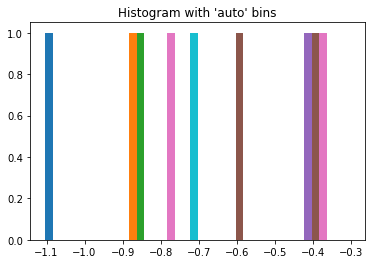

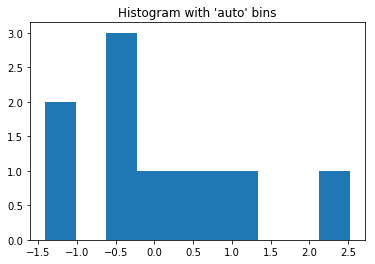

/Users/tianweixing/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6097: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 260)
  '(shape is %d x %d)' % inp.shape[::-1])


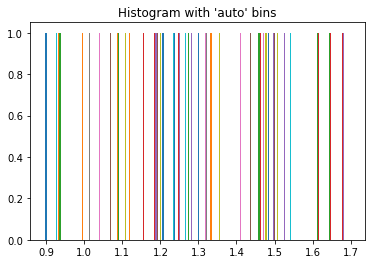

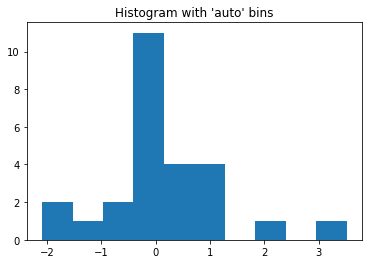

In [25]:
import matplotlib.pyplot as plt
plt.hist(np.reshape(param_w1, [1,40]), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

plt.hist(param_b1, bins=10)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

plt.hist(np.reshape(param_w2, [1,260]), bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

plt.hist(param_b2, bins=10)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()